# More on Covered Calls

This [strategy](https://www.investopedia.com/terms/c/coveredcall.asp) involves purchasing a number of shares and simultaneously selling the same number of call options. 

If the stock price is below the strike price of the call options at expiration, the trader pockets the option premium and keeps the shares. Since the trader still owns these shares, s/he might as well sell covered calls the following month. This is the scenario considered in this notebook.

To begin with our calculations and analysis, the necessary resources, such as the *Strategy* class from the *Strategy* module of the *Optx* package, must be imported.

In [1]:
from Optx.Strategy import Strategy
from time import time
from numpy import zeros
import matplotlib.pyplot as plt
%matplotlib inline

A *Strategy* object must then be created.

In [2]:
st=Strategy()

The data used in the calculations are passed to the *getdata* method of the newly created *Strategy* object.

In this case, the data refers to Apple stocks (ticker: \$APPL) on November 22, 2021. The maturity of the call option was November 17, 2021. The stock price on the start date (that is, the date the strategy was implemented) was 164.04.

However, the trader already owned 100 Apple shares which s/he previously purchased at 158.00. With these shares in hand, the trader sold 100 strike calls at 175.00 for 1.15 each.

A (log)normal distribution of stock prices at expiration, assuming risk neutrality, as in the Black-Scholes model, was used to estimate the probability of profit at maturity.

In [3]:
distribution="normal-risk-neutral"
stockprice=164.04
volatility=0.272
startdate="2021-11-22"
targetdate="2021-12-17"
interestrate=0.0002
minstock=stockprice-round(stockprice*0.5,2)
maxstock=stockprice+round(stockprice*0.5,2)
strategy=[{"type":"stock","n":100,"action":"buy","prevpos":158.00},
          {"type":"call","strike":175.00,"premium":1.15,"n":100,"action":"sell"}]

st.getdata(stockprice=stockprice,startdate=startdate,targetdate=targetdate,volatility=volatility,interestrate=interestrate,
           minstock=minstock,maxstock=maxstock,strategy=strategy,distribution=distribution)

The payoff and **probability of profit** (PoP) of covered calls are calculated by calling the *run* method of the *Strategy* object.

In [4]:
start=time()
st.run()
end=time()
print("Time elapsed: %f s" % (end-start))

Time elapsed: 0.014516 s


Profit/loss data is obtained via a call to the *getprofit* method and plotted for the covered calls, the stock position and the short call.

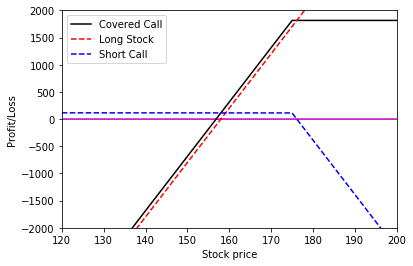

In [5]:
s,pl_total=st.getPL()
leg=[]
for i in range(len(strategy)):
    leg.append(st.getPL(i)[1])
    
zeroline=zeros(s.shape[0])
plt.xlabel("Stock price")
plt.ylabel("Profit/Loss")
plt.xlim(120,200)
plt.ylim(-2000,2000)
plt.plot(s,zeroline,'m-')
plt.plot(s,pl_total,'k-',label="Covered Call")
plt.plot(s,leg[0],'r--',label="Long Stock")
plt.plot(s,leg[1],'b--',label="Short Call")
plt.legend(loc="upper left")

Below one can see some useful, additional results of the calculations made for the strategy, including its PoP.

In [6]:
print("Initial position value: %.2f" % st.getbalance())

maxloss,maxprofit=st.getmaxPL()

print("Maximum loss (in the stock price range): %.2f" % abs(maxloss))
print("Maximum profit (in the stock price range): %.2f" % maxprofit)

profitbounds=st.getprofitbounds()

print("Profitable stock price range:")

for i in range(len(profitbounds)):
    print("      %.2f ---> %.2f" % (profitbounds[i][0],profitbounds[i][1]))

print("Probability of Profit (PoP): %.1f%%" % (st.getprobabilities()[0]*100.0))

Initial position value: 719.00
Maximum loss (in the stock price range): 7483.00
Maximum profit (in the stock price range): 1815.00
Profitable stock price range:
      156.86 ---> inf
Probability of Profit (PoP): 71.3%
